In this Notebook, we will demostrate how to use visualization functions to make geospatial plot and time-series plot.

#### Geo-spatial plots

Now we load the exmple data of geospatial plots.

In [1]:
import pickle
import numpy as np
import geopandas as gpd
from ml_lsmodel_ascat.plot import plot_gsdata
from ml_lsmodel_ascat.util import select_geom

file_data_gs = './example_data/testdata_plot_mean_sig_slop_curv'
shp_file = './example_data/shp/france.shp'

# Visualization geo-spatial plot
with open(file_data_gs, 'rb') as f:
    df_plot_gs = pickle.load(f)

# Crop data
geo_france = gpd.read_file(shp_file)
df_plot_gs = select_geom(df_plot_gs, geo_france)
    
# Normalize the last three columns
for col in ['mean_sig_cp', 'mean_slop_cp', 'mean_curv_cp']:
    df_plot_gs[col] = (df_plot_gs[col] - df_plot_gs[col].min())/(df_plot_gs[col].max() - df_plot_gs[col].min())

# Mannually introduce a large number
df_plot_gs.loc[500, 'mean_sig_cp'] = 5   
    
df_plot_gs

,lat,lon,mean_sig,mean_slop,mean_curv,mean_sig_cp,mean_slop_cp,mean_curv_cp
157,42.875,-0.625,-8.839044,-0.121388,-0.001201,0.465160,0.219727,0.621308
158,42.875,-0.375,-8.686383,-0.123934,-0.001522,0.480409,0.201489,0.585813
159,42.875,-0.125,-8.513319,-0.122236,-0.001736,0.497697,0.213653,0.562043
174,43.125,-1.375,-8.998527,-0.095194,-0.001748,0.449229,0.407409,0.560726
175,43.125,-1.125,-9.153990,-0.103400,-0.001310,0.433700,0.348612,0.609316
...,...,...,...,...,...,...,...,...
2495,49.375,5.625,-9.299548,-0.105438,0.000121,0.419160,0.334009,0.767980
2496,49.375,5.875,-8.492732,-0.089026,-0.000785,0.499753,0.451607,0.667541
2497,49.375,6.125,-7.978891,-0.076001,-0.002238,0.551081,0.544934,0.506391
2498,49.375,6.375,-8.586911,-0.085526,-0.001001,0.490346,0.476682,0.643566


The example data is a DataFrame. Each row represents data point to visualize. The eight columns represents the . They are:

- lat, lon: point coordinates
- mean_sig, mean_slop_cp, mean_curv: mean of sig, slop and curv in temporal
- mean_sig_cp, mean_slop_cp, mean_curv_cp: copy of the former three columns but normalized to [0,1]

We are going to vislualize all columns except 'lat' and 'lon'. Each column will be vislulized into a subplot.

Now we set up input parameters for visulization. And make a Geo-spatial plot.

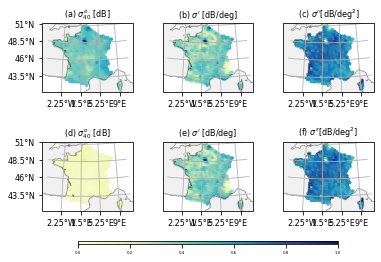

In [2]:
title_lists = [
    r'$\sigma_{40}^o$ [dB]', r"$\sigma^{\prime}$ [dB/deg]",
    r'$\sigma^{\prime\prime}{\rm[dB/deg^2]}$'
]
title_lists.extend(title_lists)
rowlabel_list = ['mean', 'mean copy']
kw_padding = {'pad': 5, 'h_pad': 5, 'w_pad': 3}

fig, axes, cbars = plot_gsdata(df_plot_gs,
                nrowcol=(2, 3),
                titles=title_lists,
                rowlabels=rowlabel_list,               
                cbar_mode='fig',
                kw_padding=kw_padding)
fig.show()

As we can see, the visual effect of one plot is not optimal, due to the large value we introduced. We can add some customized configuration to enhance the visualization effect. To do this, you can use the three handles output by `plot_gsdata`

In [3]:
print(fig) # Handle of the figure
print(axes) # List of handles of the subplots
print(cbars) # List of handles of the colorbars

Figure(432x288)
[[<cartopy.mpl.geoaxes.GeoAxesSubplot object at 0x7f20b0838d00>


We can set the colorlimits of all plots in the second row to [0, 1].

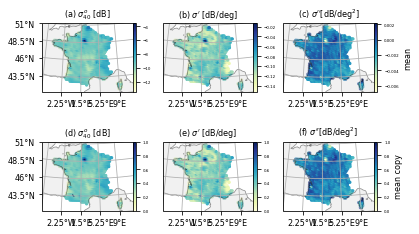

In [4]:
fig, axes, cbars = plot_gsdata(df_plot_gs,
                nrowcol=(2, 3),
                titles=title_lists,
                rowlabels=rowlabel_list,
                cbar_mode='plot',
                kw_padding=kw_padding)

cbars[1][0].mappable.set_clim(0, 1)
cbars[1][1].mappable.set_clim(0, 1)
cbars[1][2].mappable.set_clim(0, 1)
fig.show()

By using the handles, you can do many customized settings as documented on [matplotlib.org](matplotlib.org). Below is an example of:

- Changing the title of one subplot, and
- replacing all colorbars in the second row with a single new colorbar and a new colormap
- Set tick labels for the new colorbar

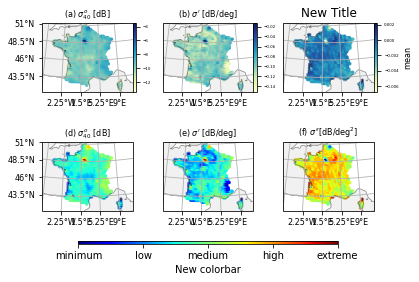

In [5]:
import matplotlib.pyplot as plt
fig, axes, cbars = plot_gsdata(df_plot_gs,
                nrowcol=(2, 3),
                titles=title_lists,
                rowlabels=rowlabel_list,
                cbar_mode='plot',
                kw_padding=kw_padding)

# Change one title
axes[0][2].set_title('New Title')

# Repalce the old colorbar
mp = cbars[1][0].mappable # save one colorbar as a mappable object
for i in range(3):
    cbars[1][i].mappable.set_clim(0, 1)
    cbars[1][i].mappable.set_cmap('jet')
    cbars[1][i].remove()
new_cbar_axis = fig.add_axes([0.2, 0.06, 0.6, 0.01])
new_cbar = plt.colorbar(mp, cax=new_cbar_axis, orientation='horizontal')
new_cbar.ax.set_xlabel('New colorbar')

# Configure colorbar ticks
cbar_tick_label = ['minimum', 'low', 'medium', 'high', 'extreme']
tick_locs = [0, 0.25, 0.5, 0.75, 1]
new_cbar.set_ticks(tick_locs)
new_cbar.ax.set_xticklabels(cbar_tick_label, fontdict={'size': 10})
fig.show()

When you are satisfied with the figure, you can export it into the local disk

In [6]:
fig.savefig('gs_plot.png', bbox_inches='tight', format='png')

#### Time-series plots

Below we demontrate how to make series of time-series plots with `plot_tsdata`.

First we will load the toy data from `testdata_plot_timeseries_toy`. It's a data frame with three columns: `TS1`, `TS2`, and `TS3`. All three columns are sinusoid time-series with noise. 

We will add some linear signal to them to make three sets of toy datasets, each with 3 time-series. Then we repeat the three datasets again to make a 2x3 data list.

In [7]:
import pickle
import numpy as np
from ml_lsmodel_ascat.plot import plot_tsdata

file_data_ts = './example_data/testdata_plot_timeseries_toy'
with open(file_data_ts, 'rb') as f:
    df_plot_ts = pickle.load(f)

# This is a sinusoid signal
df_plot_ts = df_plot_ts[0:800]

# Add linear signal and repeat twice
vec1 = np.linspace(0,1,800)
vec2 = np.linspace(0,-1,800)
vec3 = np.linspace(0,2,800)
mat1 = np.stack((vec1, vec2, vec3), axis=1)
mat2 = np.stack((vec2, vec3, vec1), axis=1)
mat3 = np.stack((vec3, vec1, vec2), axis=1)
ls_plot_ts = [df_plot_ts+mat1, df_plot_ts+mat2+mat1, df_plot_ts+mat2+mat3]*2 

ls_plot_ts

[                   TS1       TS2       TS3
 datetime_doy                              
 2007-01-02    0.465964  0.492285  0.795218
 2007-01-02    0.680198  0.712775  0.423647
 2007-01-03    0.210217  0.686687  0.207842
 2007-01-04    1.011780  0.798668  0.544416
 2007-01-05    0.901167  0.785540  1.000886
 ...                ...       ...       ...
 2009-04-02    2.080115  0.445239  3.463576
 2009-04-03    2.264640  0.310990  2.625773
 2009-04-03    1.619316 -0.193004  2.766996
 2009-04-04    1.766939 -0.400693  3.003837
 2009-04-06    1.965206 -0.435235  2.715879
 
 [800 rows x 3 columns],
                    TS1       TS2       TS3
 datetime_doy                              
 2007-01-02    0.465964  0.492285  0.795218
 2007-01-02    0.678946  0.715278  0.424898
 2007-01-03    0.207714  0.691693  0.210345
 2007-01-04    1.008026  0.806177  0.548171
 2007-01-05    0.896160  0.795553  1.005892
 ...                ...       ...       ...
 2009-04-02    1.085122  2.435226  4.458569
 2009-04-03    1.268395  2.303481  3.622019
 2009-04-03    0.621819  1.801990  3.764492
 2009-04-04    0.768191  1.596804  4.002585
 2009-04-06    0.965206  1.564765  3.715879
 
 [800 rows x 3 columns],
                    TS1       TS2       TS3
 datetime_doy                              
 2007-01-02    0.465964  0.492285  0.795218
 2007-01-02    0.680198  0.717781  0.421144
 2007-01-03    0.210217  0.696700  0.202836
 2007-01-04    1.011780  0.813686  0.536907
 2007-01-05    0.901167  0.805565  0.990873
 ...                ...       ...       ...
 2009-04-02    2.080115  4.425214  1.473588
 2009-04-03    2.264640  4.295971  0.633283
 2009-04-03    1.619316  3.796983  0.772002
 2009-04-04    1.766939  3.594301  1.006340
 2009-04-06    1.965206  3.564765  0.715879
 
 [800 rows x 3 columns],
                    TS1       TS2       TS3
 datetime_doy                              
 2007-01-02    0.465964  0.492285  0.795218
 2007-01-02    0.680198  0.712775  0.423647
 2007-01-03    0.210217  0.686687  0.207842
 2007-01-04    1.011780  0.798668  0.544416
 2007-01-05    0.901167  0.785540  1.000886
 ...                ...       ...       ...
 2009-04-02    2.080115  0.445239  3.463576
 2009-04-03    2.264640  0.310990  2.625773
 2009-04-03    1.619316 -0.193004  2.766996
 2009-04-04    1.766939 -0.400693  3.003837
 2009-04-06    1.965206 -0.435235  2.715879
 
 [800 rows x 3 columns],
                    TS1       TS2       TS3
 datetime_doy                              
 2007-01-02    0.465964  0.492285  0.795218
 2007-01-02    0.678946  0.715278  0.424898
 2007-01-03    0.207714  0.691693  0.210345
 2007-01-04    1.008026  0.806177  0.548171
 2007-01-05    0.896160  0.795553  1.005892
 ...                ...       ...       ...
 2009-04-02    1.085122  2.435226  4.458569
 2009-04-03    1.268395  2.303481  3.622019
 2009-04-03    0.621819  1.801990  3.764492
 2009-04-04    0.768191  1.596804  4.002585
 2009-04-06    0.965206  1.564765  3.715879
 
 [800 rows x 3 columns],
                    TS1       TS2       TS3
 datetime_doy                              
 2007-01-02    0.465964  0.492285  0.795218
 2007-01-02    0.680198  0.717781  0.421144
 2007-01-03    0.210217  0.696700  0.202836
 2007-01-04    1.011780  0.813686  0.536907
 2007-01-05    0.901167  0.805565  0.990873
 ...                ...       ...       ...
 2009-04-02    2.080115  4.425214  1.473588
 2009-04-03    2.264640  4.295971  0.633283
 2009-04-03    1.619316  3.796983  0.772002
 2009-04-04    1.766939  3.594301  1.006340
 2009-04-06    1.965206  3.564765  0.715879
 
 [800 rows x 3 columns]]

Then we set some visualization configurations. For `TS1` and `TS2` fields we manually set the line color and line styles. 

In [8]:
ls_plot_ts = [df_plot_ts+mat1, df_plot_ts+mat2+mat1, df_plot_ts+mat2+mat3]*2  # repeat 6 times
kw_plot = {'TS1': {'color':'b',
                   'linestyle': '-'},
           'TS3': {'color':'k',
                   'linestyle': '-.'}}
figsize = (42,12)

Then we plot the toy data

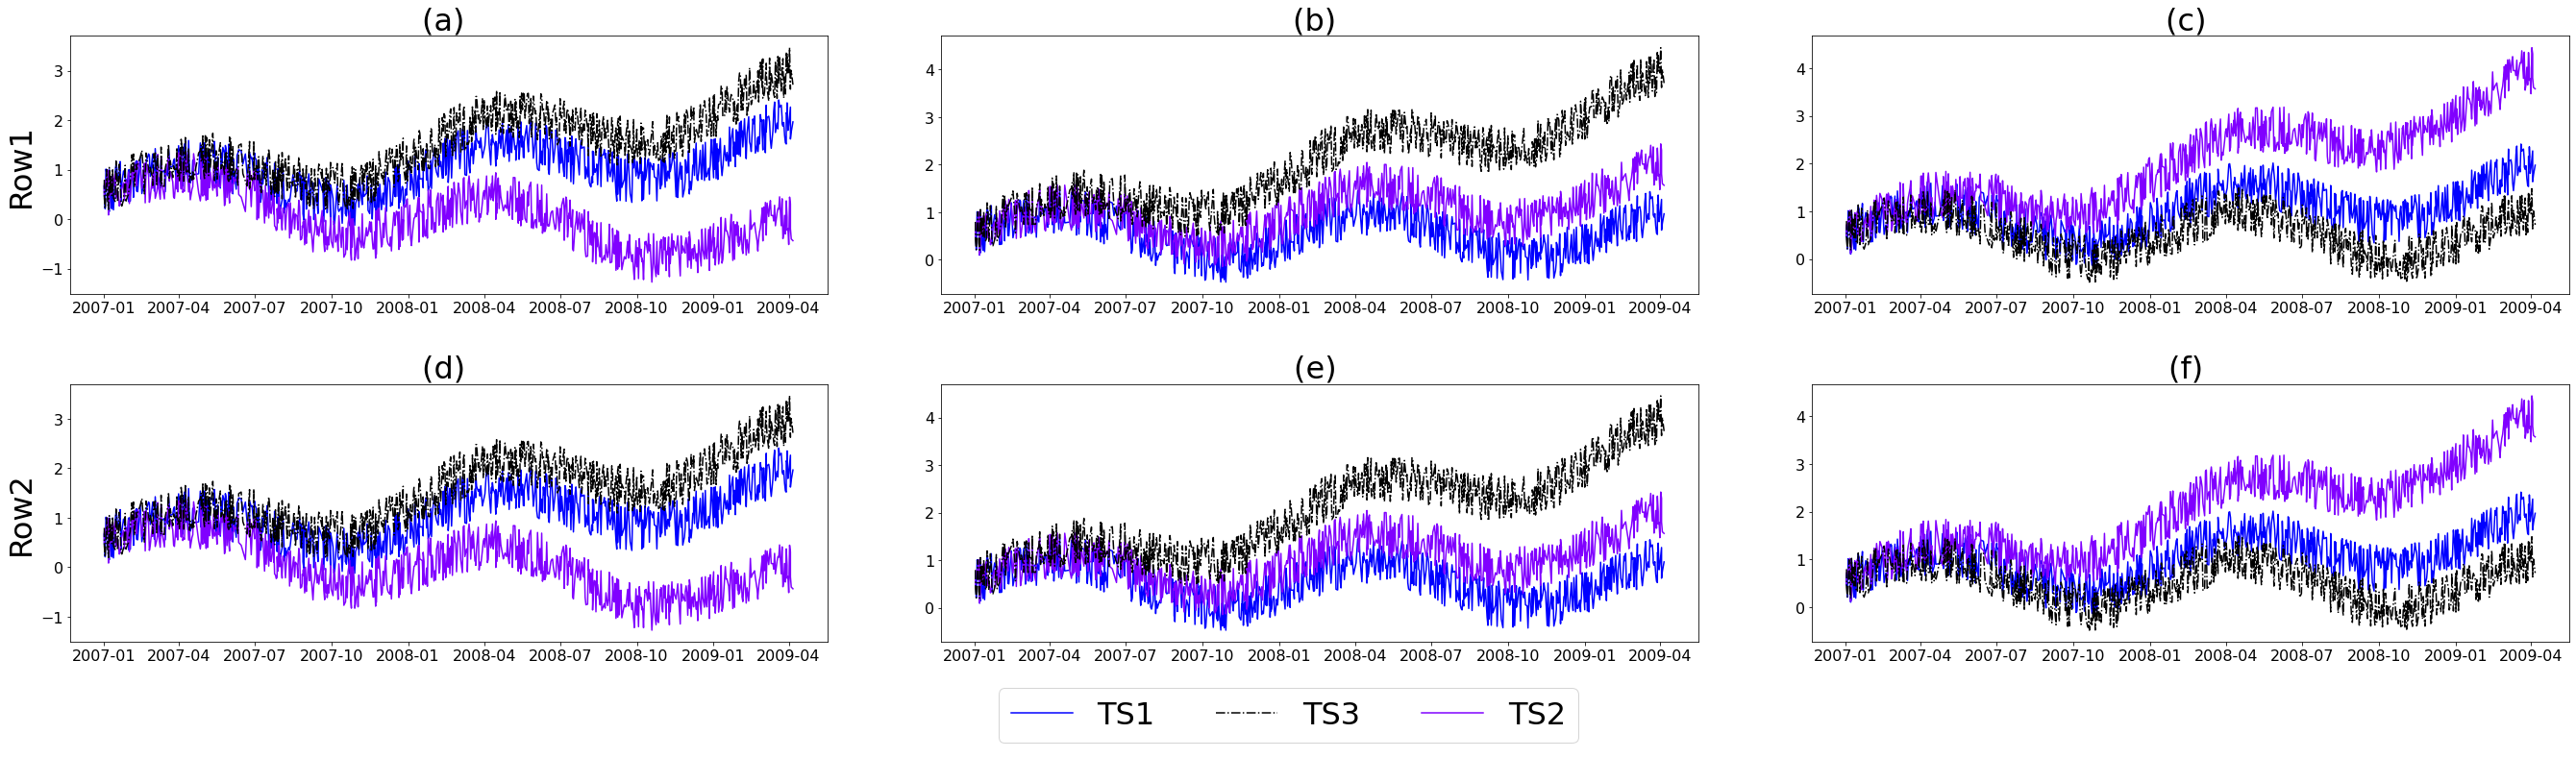

In [9]:
fig, axes, linelist, legend = plot_tsdata(ls_plot_ts,
                nrowcol=(2, 3),
                figsize=figsize,
                kw_plot=kw_plot,
                fontsize=32,
                rowlabels=['Row1', 'Row2'])

# Figure size can be adjusted via the "fig" handle
fig.subplots_adjust(left=0.07,
                    right=0.93,
                    wspace=0.15,
                    hspace=0.35,
                    bottom=0.15)

fig.show()

You can configure the line style after plotting via `linelist` handle. It assembles all linehandles of all DataFrame fields. 

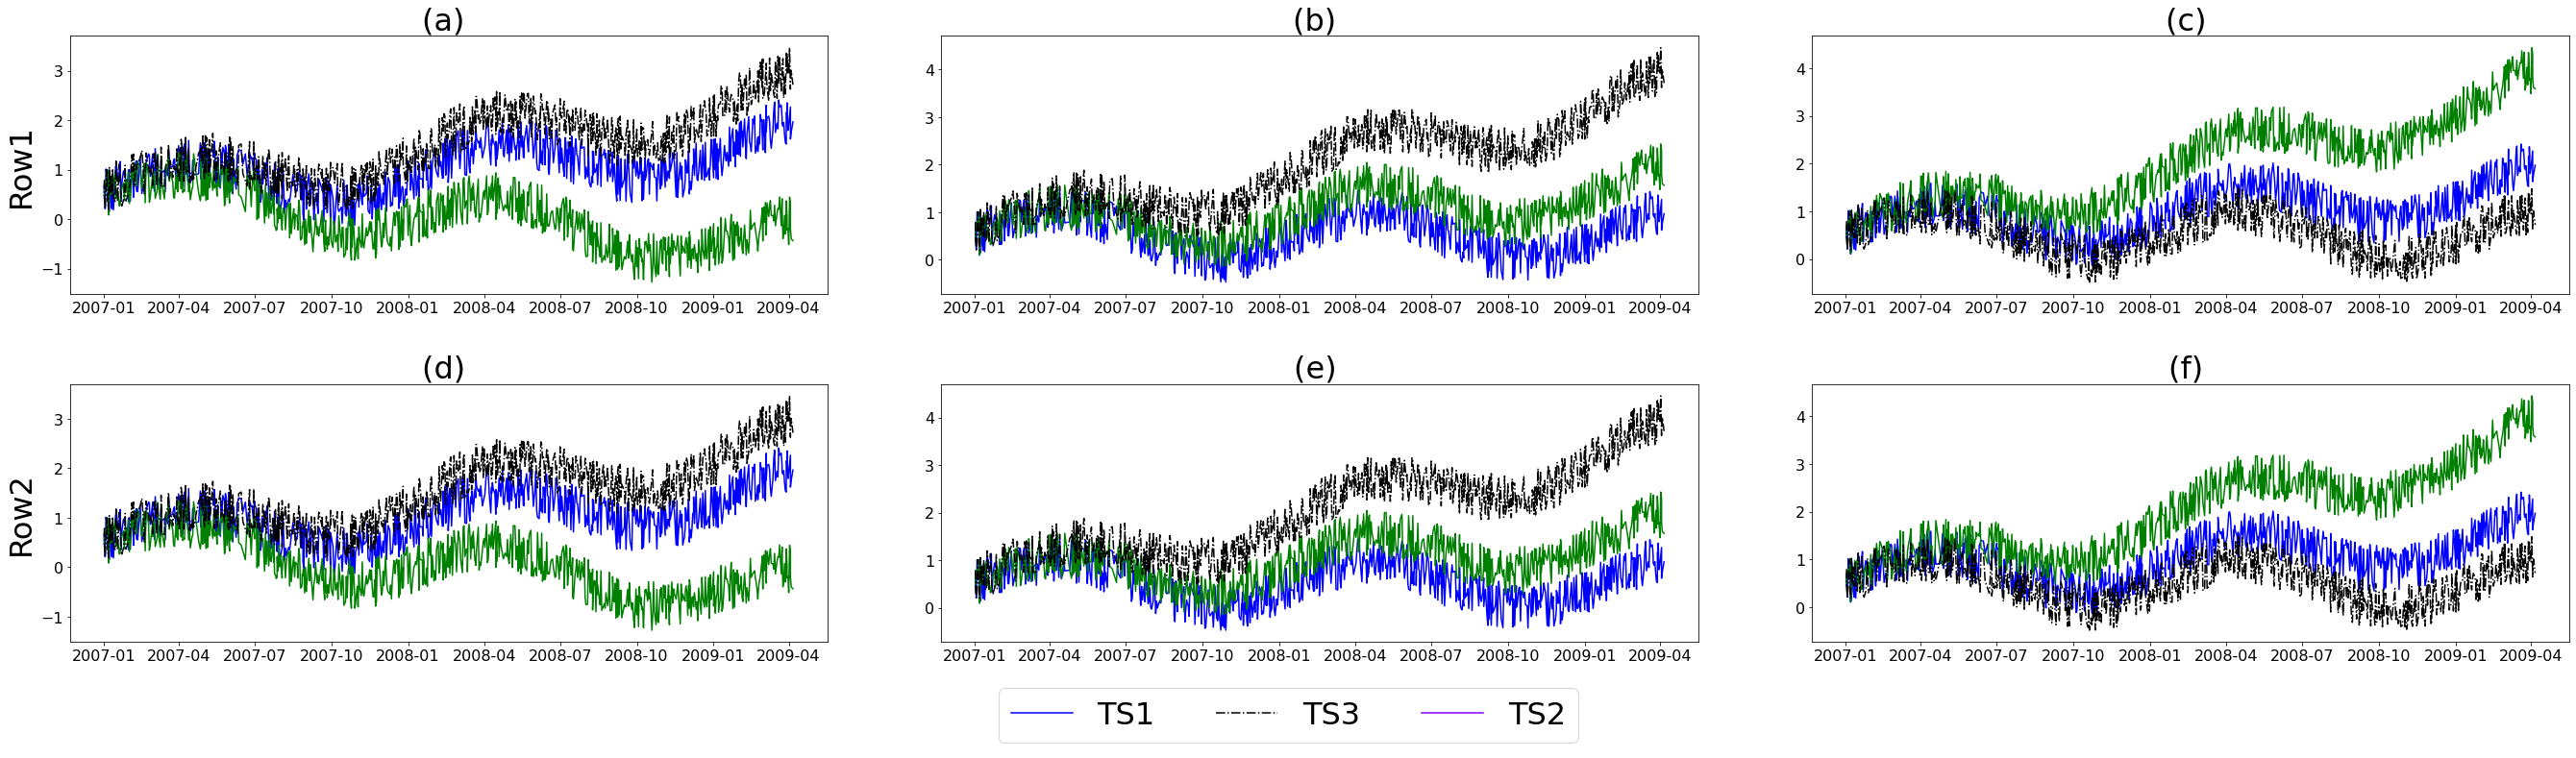

In [10]:
fig, axes, linelist, legend = plot_tsdata(ls_plot_ts,
                nrowcol=(2, 3),
                figsize=figsize,
                kw_plot=kw_plot,
                fontsize=32,
                rowlabels=['Row1', 'Row2'])

fig.subplots_adjust(left=0.07,
                    right=0.93,
                    wspace=0.15,
                    hspace=0.35,
                    bottom=0.15)

for line_handle in linelist['TS2']:
    line_handle.set_color('g')

fig.show()

After configuration you can save the plot

In [11]:
fig.savefig('ts_plot.png', bbox_inches='tight', format='png')